In [ ]:
## mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/MASKED_RCNN')

In [ ]:
!ls

AI_Car_parking_video.mp4  Mask_RCNN


In [ ]:
## since we are using Mask RCNN it is build sarrounded by keras 2.0.8 and tensorflow 1.3 so we need to update the keras and tensorflow
!pip install keras==2.0.8

     |████████████████████████████████| 276kB 8.4MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.8 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!pip install tensorflow==1.13.2

     |████████████████████████████████| 92.7MB 44kB/s 
     |████████████████████████████████| 3.2MB 48.9MB/s 
     |████████████████████████████████| 368kB 49.3MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [ ]:
!nvidia-smi

Sun Mar 14 06:13:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
## git cloning of the MaskRCNN repository
!git clone https://github.com/matterport/Mask_RCNN.git


fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [ ]:
!pip install twilio

     |████████████████████████████████| 471kB 7.2MB/s 
  Created wheel for twilio: filename=twilio-6.53.0-py2.py3-none-any.whl size=1251197 sha256=2390e24fbf1fbe3a9e55bf8a3d6c5467c80e50a9547764d6ba08cade38de5a03
  Stored in directory: /root/.cache/pip/wheels/80/92/b0/f7fcc5d56edd9d23fe35c73400c6f600aefe736e05a9e70806
Successfully built twilio


In [ ]:
import sys
import os

root_dir=os.path.abspath('/content/drive/MyDrive/MASKED_RCNN/Mask_RCNN')
sys.path.append(root_dir)
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN',
 '/content/Mask_RCNN',
 '/content/Mask_RCNN',
 '/content/Mask_RCNN/samples/coco',
 '/content/drive/MyDrive/MASKED_RCNN/Mask_RCNN/samples/coco',
 '/content/drive/MyDrive',
 '/content/drive/MyDrive/MASKED_RCNN/Mask_RCNN']

In [ ]:
## installing requirement txt file
!pip install -r /content/drive/MyDrive/MASKED_RCNN/Mask_RCNN/requirements.txt

     |████████████████████████████████| 163kB 7.8MB/s 
     |████████████████████████████████| 204kB 32.6MB/s 


In [ ]:
!pip install opencv-python

In [ ]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
from matplotlib import rcParams
import cv2
import keras 
import tensorflow
import seaborn as sns

In [ ]:
import os
os.chdir("/content/drive/My Drive/MASKED_RCNN/Mask_RCNN/")

In [ ]:
import mrcnn.config
import mrcnn.utils
from mrcnn.model import MaskRCNN
from pathlib import Path
from twilio.rest import Client

In [ ]:
## GPU confugaration ## maskRCNN configaration
class interferenceconfig(mrcnn.config.Config):
  NAME = "coco_pretrained_model_config"
  IMAGES_PER_GPU = 1
  GPU_COUNT = 1
  NUM_CLASSES = 1 + 80  
  DETECTION_MIN_CONFIDENCE = 0.6

config= interferenceconfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.6
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [ ]:
## making bounding box of the car
def get_car_boxes(boxes,class_ids): ## class_ids is the labels of the MaskRCNN
  car_boxes=[]
  for i,box in enumerate(boxes): ## each box of the free space we have to detect what is present in that free space
    if class_ids[i] in [3,8,6]: ## 3,8,6 are the label whereas 3 indicate the car,8 indicate the truck and 6 may be the person
      car_boxes.append(box)
  return np.array(car_boxes)

In [ ]:
## twilio config
twilio_acc_sid="ACf5b2a892762d5c97bdb07583dd13a225"
twilio_auth_token="59eab84f49d3f00e6594479253b62147"
twilio_ph_no="+8283736953"
twilio_destination_no="+8617864426"
client=Client(twilio_acc_sid,twilio_auth_token)

In [ ]:
## importing coco datasets
sys.path.append(os.path.join(root_dir,"/content/drive/MyDrive/MASKED_RCNN/Mask_RCNN/samples/coco"))
import coco
model_dir=os.path.join(root_dir, "logs")
coco_model_path= os.path.join(root_dir,"mask_rcnn_coco.h5")

In [ ]:
if not os.path.exists(coco_model_path):
  mrcnn.utils.download_trained_weights(coco_model_path)

... done downloading pretrained model!


In [ ]:
model=MaskRCNN(mode='inference',model_dir=model_dir,config=config)
model.load_weights(coco_model_path,by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


current frame per counter0


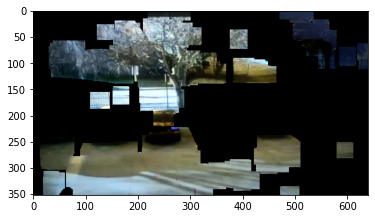

current frame per counter5


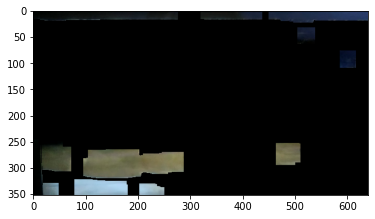

current frame per counter10


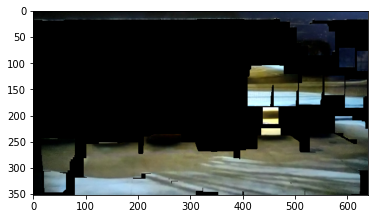

current frame per counter15


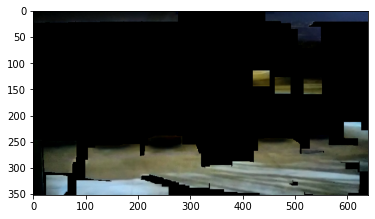

current frame per counter20


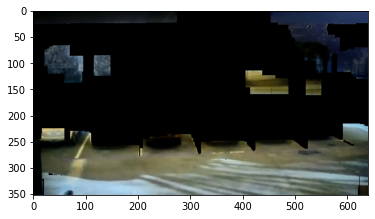

current frame per counter25


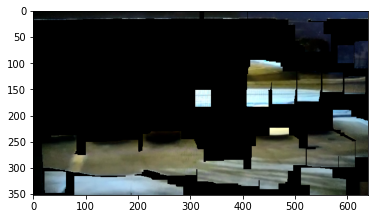

current frame per counter30


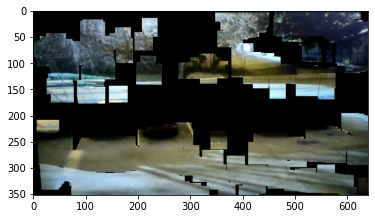

current frame per counter35


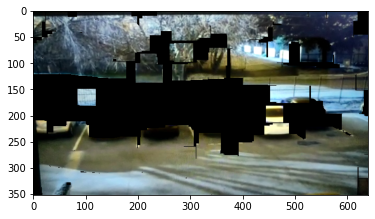

going to mark vechile frame number: 41
SENDING SMS!!!


TwilioRestException: ignored

In [ ]:
video_source="/content/drive/MyDrive/MASKED_RCNN/AI_Car_parking_video.mp4"

## spotting park spaces
parked_car_box=None
car_box=None

video_cap=cv2.VideoCapture(video_source)
free_space_frame=0
sms_sent=False
count=0
temp=np.array(4,)
parked_car_box1=[None]*11

def checkEqual2(iterator):
  print(iterator)


## loop over each frame in the video
counter = 0
ref_image = None
ref_image_color = None
cumm_image = None
img_thresh_sub1 = None
final_ref = None

while True:
  ret,frame=video_cap.read()

  if not ret:
    print("couldn't read video")
    break

  elif counter<40:
    ## let's say the video having fps of 30 that means frame per second at much speed images is shown. Here for 40 frames we are checking at 1 sec a
    ## and then 1.1 second we are checking possibility of motion by MaskRCNN by creating two different video object two find out the difference 
    ## in background pixel to pixel.So that we can able to detect the movement of the pixel.
    ## creating another video object to compare the two different frame to find out the possibility of motion 
    ret,frame1=video_cap.read()
    d=cv2.absdiff(frame,frame1)
    grey=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
    blur=cv2.GaussianBlur(grey,(1,1),0)
    rat,th=cv2.threshold(blur,20,255,cv2.THRESH_BINARY) 
     
    ## performing the morphological operation
    dilated=cv2.dilate(th,np.ones((30,30),np.uint8),iterations=1)
    erode=cv2.erode(dilated,np.ones((30,30),np.uint8),iterations=1)

    ## fill the contours for better morphing of the vechile
    c,_=cv2.findContours(erode,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    frame1=cv2.drawContours(frame1, c, -1, (0,0,0), cv2.FILLED) 

    ## now we will checking and visualize every five frame
    if counter%5==0:
      print("current frame per counter"+str(counter))
      plt.imshow(frame1)
      plt.show()

    counter=counter+1 ## here that means we will continue for 40fps for checking the possibility of motion and increase the count by 1 after this 
    continue      ## execution will be stop here.

  ## converting BGR colour to RGB color
  if counter==40:
    rgb_img=frame1[:,:,::-1]
    counter+=1
  else:
    rgb_img=frame[:,:,::-1]

  result=model.detect([rgb_img],verbose=0)
  r=result[0]

  if parked_car_box is None:
    print("going to mark vechile frame number:",counter)
    video_cap=cv2.VideoCapture(video_source)
    ## this is the first frame assume all the car detected in parking spaces and save the location of each car in parking space box and go to the 
    ## next frame
    parked_car_box=get_car_boxes(r['rois'],r['class_ids'])
  else:
    ## get where the car is currently located in the frame
    car_box=get_car_boxes(r['rois'],r['class_ids'])

    ## see how much car overlaps with the known parking space

    overlaps= mrcnn.utils.compute_overlaps(parked_car_box, car_box) ## sometimes in parking area the cars are veru close to each other so while 
    ## detecting car boxes may overlap with each other . So by MaskRCNN we detect that overlaps.

    ## assume no spaces are free until we find out the new one
    free_space=False

    ## now to clearly visualize the overlaps
    for parking_area,overlap_area in zip(parked_car_box,overlaps):
      ## find out the max overlap
      max_overlap=np.max(overlap_area)
      
      ## finding out of the cordinates of left bottom,right bottom,right and left upper of the parking area
      y1,x1,y2,x2=parking_area

      ## if the max_overlaps are less than particular threshold value that means parking space is available and making with green colour
      if max_overlap<0.15:
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,255,0),3)
        free_space=True

      else:
        cv2.rectangle(frame,(x1,y1),(x2,y2),(0,0,255),1) ## parking space is still occupied and marking by red box

      ## write the max overlaps measurement inside the box
      font=cv2.FONT_HERSHEY_DUPLEX
      cv2.putText(frame, f"{max_overlap:0.2}", (x1 + 6, y2 - 6), font, 0.3, (255, 255, 255))

      ## checking the parking space
      if free_space:
        free_space_frame += 1
      
      else:
        free_space_frame += 0 ## else reset to zero

      ## if the space is free for the several frames then it is really free
      if free_space_frame>120:
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, f"SPACE AVAILABLE!", (10, 150), font, 3.0, (0, 255, 0), 2, cv2.FILLED)

        ## sending sms
        if not sms_sent:
          print("SENDING SMS!!!")
          message=client.messages.create(body='PARKING SPACE AVAILABLE!!!',from_=twilio_ph_no,to=twilio_destination_no)
          sms_sent=True
          print("Hope to get a message to your respective phone number")


  ## showing the video frame and saving each frame
    name = str(count) + ".jpg"
    name = os.path.join('./ak', name)
    cv2.imwrite(name, frame)
    count+=1
    
    #'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
     

print("Video finished")
video_cap.release()  

In [ ]:
## creating a video including all the frame and the whole demonstration of the project in a single video
import glob
import os
import sys
images=list(glob.iglob(os.path.join('./MASKED_RCNN', '*.*')))
images=sorted(images, key=lambda x: float(os.path.split(x)[1][:-3]))

## outvid = output video,images =list of images use in the video, fps= frame per second,size=size of
               ## each frame

def make_video(outvid, images=None, fps=30, size=None,is_color=True, format="FMP4"):
  from cv2 import VideoWriter,VideoWriter_fourcc,imread,resize
  fourcc=VideoWriter_fourcc(*format)
  vid=None
  for image in images:
    if not os.path.exists(image):
      raise FileNotFoundError(image) 
    img=imread(image)
    if vid is None:
      if size is None:
        size=img.shape[1],img.shape[0]
      vid=VideoWriter(outvid,fourcc,float(fps),size,is_color)
    
    if size[0]!=img.shape[1] and size[1]!=img.shape[0]:
      img=resize(img,size)
    vid.write(img)

  vid.release()
  return vid

make_video(' ',images,fps=30)
  


AttributeError: ignored